In [12]:
import spectral as sp
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import sys

sys.path.append('../')
from preprocessing import *
from plotting_parameters import *
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, Bbox
from mpl_toolkits.axes_grid1 import make_axes_locatable
# matplotlib.use("wxAgg")
# %matplotlib inline
%matplotlib widget
set_plotting_style("default")

#### img.bands
centers: List of band centers \
bandwidths: List of band FWHM values \
centers_stdevs: List of std devs of band centers \
bandwidth_stdevs: List of std devs of bands FWHMs \
band_quantity: Image data type (e.g., "reflectance") \
band_unit: Band unit (e.g., "nanometer")

#### img or img.params()
nbands \
nrows \
ncols \
metadata \
dtype

#### class labels
Class ID (0) = Not Labled \
Class ID (1) = Normal Tissue \
Class ID (2) = Tumor Tissue \
Class ID (3) = Hypervascularized Tissue \
Class ID (4) = Background

c:\Users\User\anaconda3\envs\thesis\lib\site-packages\spectral\io\envi.py:175: UserWarning: Parameters with non-lowercase names encountered and converted to lowercase. To retain source file parameter name capitalization, set spectral.settings.envi_support_nonlowercase_params to True.
  warnings.warn(msg)


<class 'spectral.io.bilfile.BilFile'>
img.bands.centers=[400.482, 401.21, 401.938, 402.665, 403.393, 404.12, 404.848, 405.575, 406.303, 407.031, 407.758, 408.486, 409.213, 409.941, 410.668, 411.396, 412.124, 412.851, 413.579, 414.306, 415.034, 415.761, 416.489, 417.217, 417.944, 418.672, 419.399, 420.127, 420.854, 421.582, 422.31, 423.037, 423.765, 424.492, 425.22, 425.947, 426.675, 427.403, 428.13, 428.858, 429.585, 430.313, 431.041, 431.768, 432.496, 433.223, 433.951, 434.678, 435.406, 436.134, 436.861, 437.589, 438.316, 439.044, 439.771, 440.499, 441.227, 441.954, 442.682, 443.409, 444.137, 444.864, 445.592, 446.32, 447.047, 447.775, 448.502, 449.23, 449.957, 450.685, 451.413, 452.14, 452.868, 453.595, 454.323, 455.05, 455.778, 456.506, 457.233, 457.961, 458.688, 459.416, 460.143, 460.871, 461.599, 462.326, 463.054, 463.781, 464.509, 465.237, 465.964, 466.692, 467.419, 468.147, 468.874, 469.602, 470.33, 471.057, 471.785, 472.512, 473.24, 473.967, 474.695, 475.423, 476.15, 476.878, 4

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(<Figure size 640x480 with 1 Axes>, <Axes: >)

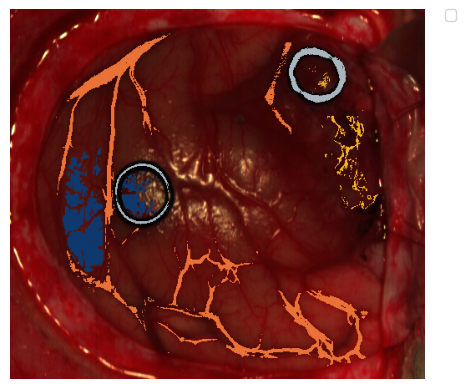

In [2]:
data_folder = "../../datasets/helicoid/012-01"
# class_labels = ["Not labled", "Normal", "Tumor", "Hypervasculized", "Background"]
class_labels = ["Not labled", "Normal", "Tumor", "Blood", "Background"]
class_colors = ["white", tum_blue_dark_2, tum_orange, tum_red, tum_grey_5]

# Load the sp data
img = sp.open_image(data_folder + "/raw.hdr")
white_ref = sp.open_image(data_folder + "/whiteReference.hdr")
dark_ref = sp.open_image(data_folder + "/darkReference.hdr")
gt_map = sp.open_image(data_folder + "/gtMap.hdr")

print(type(img))
print(f"{img.bands.centers=}")
print(f"{img.bands.band_unit=}")
print(f"{img.nbands=}")
print("default bands: " + str(img.metadata["default bands"]))
print(f"{img.shape=}, {white_ref.shape=}, {dark_ref.shape=}, {gt_map.shape=}")
pixel = img[50,100]
print(f"{pixel.shape=}")
band6 = img[:,:,5]
print(f"{band6.shape=}")

# plot the image
plot_img(img, gt_map, class_labels, class_colors, figsize=(5,5), legend=True)

### White and Dark image

Text(0.5, 1.0, 'Dark reference mean 5 band moving average')

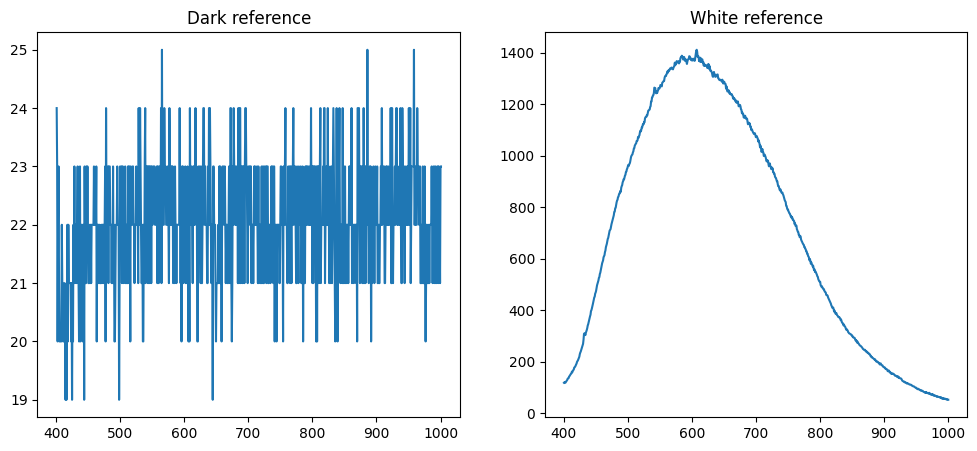

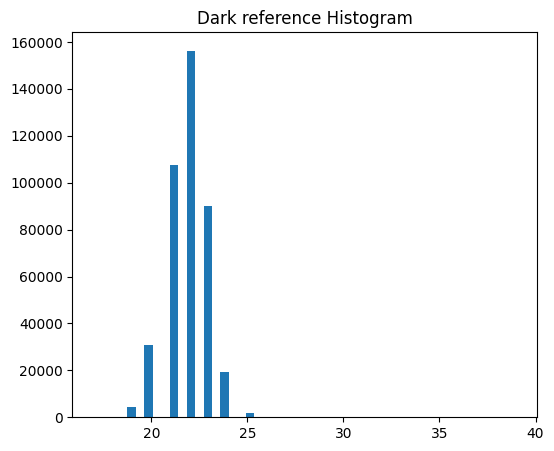

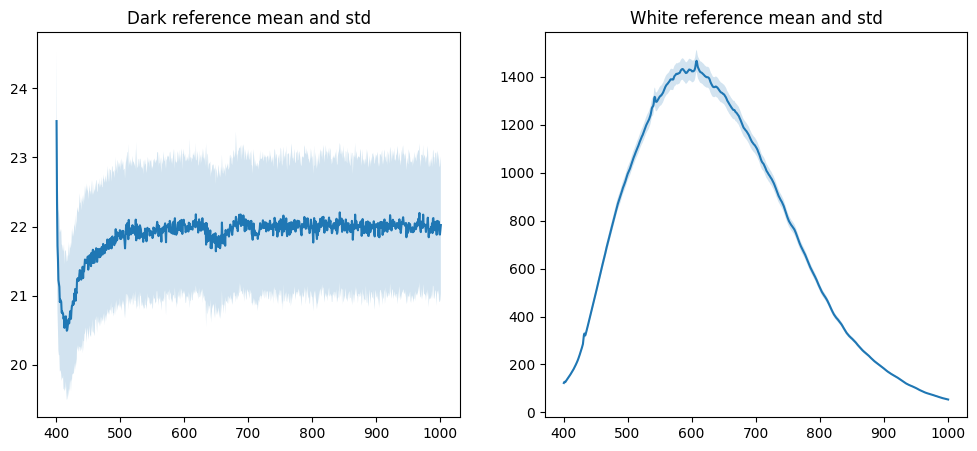

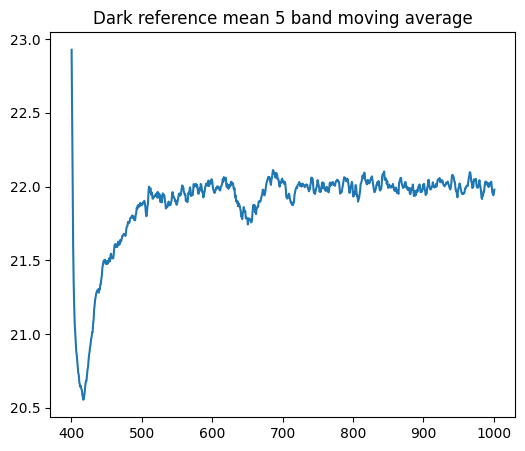

In [8]:
set_plotting_style("default")

# Example of dark and white reference for first pixel
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(img.bands.centers, dark_ref.asarray()[0,0,:])
plt.title("Dark reference")
plt.subplot(1,2,2)
plt.plot(img.bands.centers, white_ref.asarray()[0,0,:])
plt.title("White reference")


# Dark reference histogram
plt.figure(figsize=(6,5))
plt.hist(dark_ref.asarray().flatten(), bins=50)
plt.title("Dark reference Histogram")


# Dark and white reference distributions
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
dark_ref_mean = np.mean(dark_ref.asarray(), axis=(0,1))
dark_ref_std = np.std(dark_ref.asarray(), axis=(0,1))
plt.plot(img.bands.centers, np.mean(dark_ref.asarray(), axis=(0,1)))
plt.fill_between(img.bands.centers, dark_ref_mean - dark_ref_std, dark_ref_mean + dark_ref_std, alpha=0.2)
plt.title("Dark reference mean and std")
plt.subplot(1,2,2)
white_ref_mean = np.mean(white_ref.asarray(), axis=(0,1))
white_ref_std = np.std(white_ref.asarray(), axis=(0,1))
plt.plot(img.bands.centers, np.mean(white_ref.asarray(), axis=(0,1)))
plt.fill_between(img.bands.centers, white_ref_mean - white_ref_std, white_ref_mean + white_ref_std, alpha=0.2)
plt.title("White reference mean and std")

# Dark reference mean with moving average
window = 5
dark_ref_mean_extended = np.concatenate((np.repeat(dark_ref_mean[0], np.floor(window/2)), dark_ref_mean, np.repeat(dark_ref_mean[-1], np.floor(window/2))))
dark_ref_mean_5band = np.convolve(dark_ref_mean_extended, np.ones(window)/window, mode='valid')
plt.figure(figsize=(6,5))
plt.plot(img.bands.centers, dark_ref_mean_5band)
plt.title(f"Dark reference mean {window} band moving average")


Plots for thesis

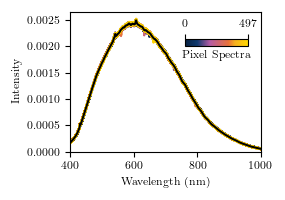

In [13]:
set_plotting_style("latex")

# plot white references of image
white_ref_plot = np.subtract(white_ref.asarray().squeeze(), dark_ref.asarray().squeeze(), dtype=np.float32)
# white_ref_plot = white_ref_plot/np.max(white_ref_plot, axis=1, keepdims=True)
white_ref_plot = white_ref_plot/ np.linalg.norm(white_ref_plot, axis=1, keepdims=True, ord=1)
fig, ax = plt.subplots(figsize=(2.85,2))
npixels = white_ref_plot.shape[0]
norm = mpl.colors.Normalize(vmin=0, vmax=npixels-1)
for i in range(npixels):
    ax.plot(img.bands.centers, white_ref_plot[i,:], color=tum_cmap(norm(i)))
# plot the mean in black
ax.plot(img.bands.centers, np.mean(white_ref_plot, axis=0), color='k')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Intensity')
ax.set_xlim([400,1000])
# ax.set_ylim([0, 1600])
ax.set_ylim([0, 0.00265])
# add colorbar
sm = plt.cm.ScalarMappable(cmap=tum_cmap, norm=plt.Normalize(0, npixels - 1))
sm.set_array(np.arange(0, npixels))  # Specify the array directly
fig.tight_layout()
cbar_ax = ax.inset_axes([0.6, 0.76, 0.33, 0.05])
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.set_xticks([0, 497])
cbar.set_label('Pixel Spectra')
# save figure as svg
# plt.savefig("../figures/white_reference_norm_helicoid_12-01.svg", format='svg', bbox_inches='tight', pad_inches=0.1)


# # Dark reference of single pixel and mean of dark reference
# plot_ref_half()
# fig, ax = plt.subplots(figsize=(2.77,2))
# print(dark_ref.asarray().shape)
# ax.plot(img.bands.centers, dark_ref.asarray()[0,0,:], color='k', linewidth=0.3)
# ax.set_xlim([400,1000])
# ax.set_ylabel('Intensity')
# ax.set_xlabel('Wavelength (nm)')
# # ax.set_ylim([18.5,25.5])
# # plt.savefig("../../figures/dark_reference_helicoid_12-01.svg", format='svg', bbox_inches='tight', pad_inches=0.1)

# fig, ax = plt.subplots(figsize=(2.77,2))
# print(dark_ref.asarray().shape)
# mean_dark_ref = np.mean(dark_ref.asarray(), axis=(0,1))
# std_dark_ref = np.std(dark_ref.asarray(), axis=(0,1))
# ax.plot(img.bands.centers, mean_dark_ref, color='k')
# ax.fill_between(img.bands.centers, mean_dark_ref - std_dark_ref, mean_dark_ref + std_dark_ref, alpha=0.2, color='k')
# ax.set_xlim([400,1000])
# ax.set_ylabel('Intensity')
# ax.set_xlabel('Wavelength (nm)')
# # ax.set_ylim([18.5,25.5])
# # plt.savefig("../../figures/dark_reference_mean_helicoid_12-01.svg", format='svg', bbox_inches='tight', pad_inches=0.1)


### Pixel spectra

Text(0.5, 0.98, 'Mean pixel spectra of raw image')

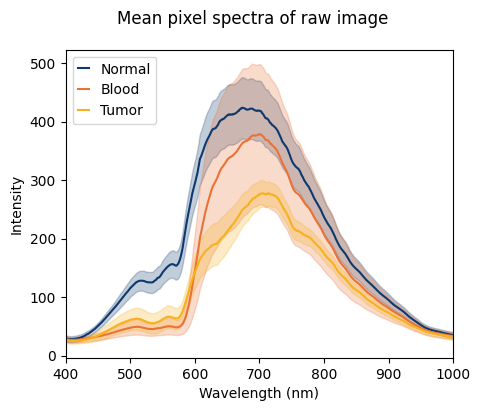

In [4]:
fig, ax = plot_class_dist(img, gt_map, img.bands.centers, [1,3,2], class_labels, class_colors)#, figsize=(2.7,2), legend_loc='upper right')
fig.suptitle('Mean pixel spectra of raw image')

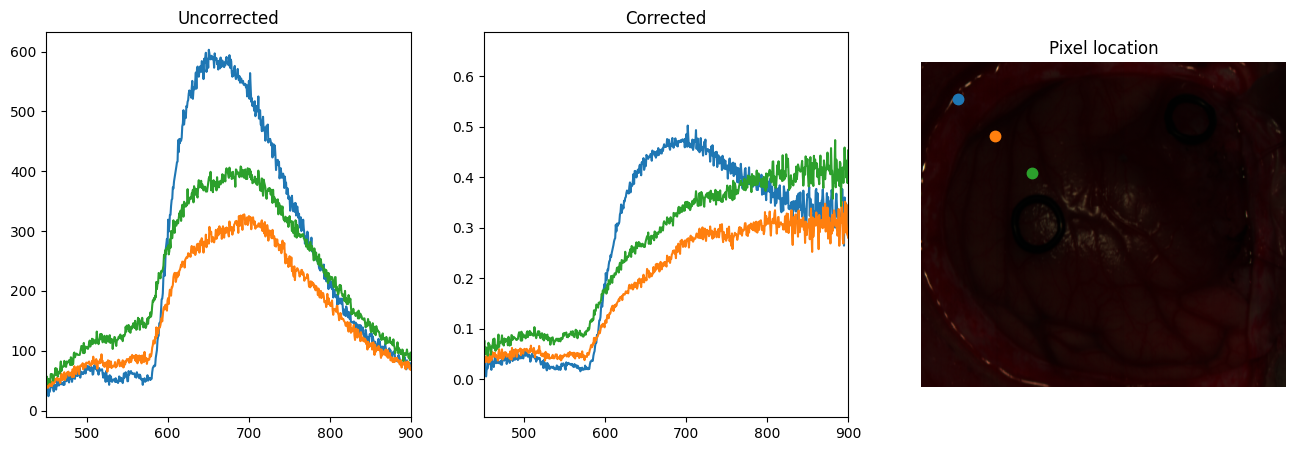

In [7]:
img_calib = calibrate_img(img, white_ref, dark_ref)

plt.figure(figsize=(16,5))
plt.subplot(1,3,3)
plt.imshow(get_rgb(img))
plt.axis('off')
for pixel in [(50,50), (100,100), (150,150)]:
    spectrum_uncorr = img[pixel]
    spectrum_corr = img_calib[pixel]

    plt.subplot(1,3,1)
    plt.plot(img.bands.centers, spectrum_uncorr)
    plt.xlim(450,900)
    plt.title("Uncorrected")
    plt.subplot(1,3,2)
    plt.plot(img.bands.centers, spectrum_corr)
    plt.xlim(450,900)
    plt.title("Corrected")
    plt.subplot(1,3,3)
    plt.plot(pixel[1], pixel[0], marker='.', markersize=15)
    plt.title("Pixel location")


### Tests with PCA on one image

Intra-class PCA

4516
855
8697


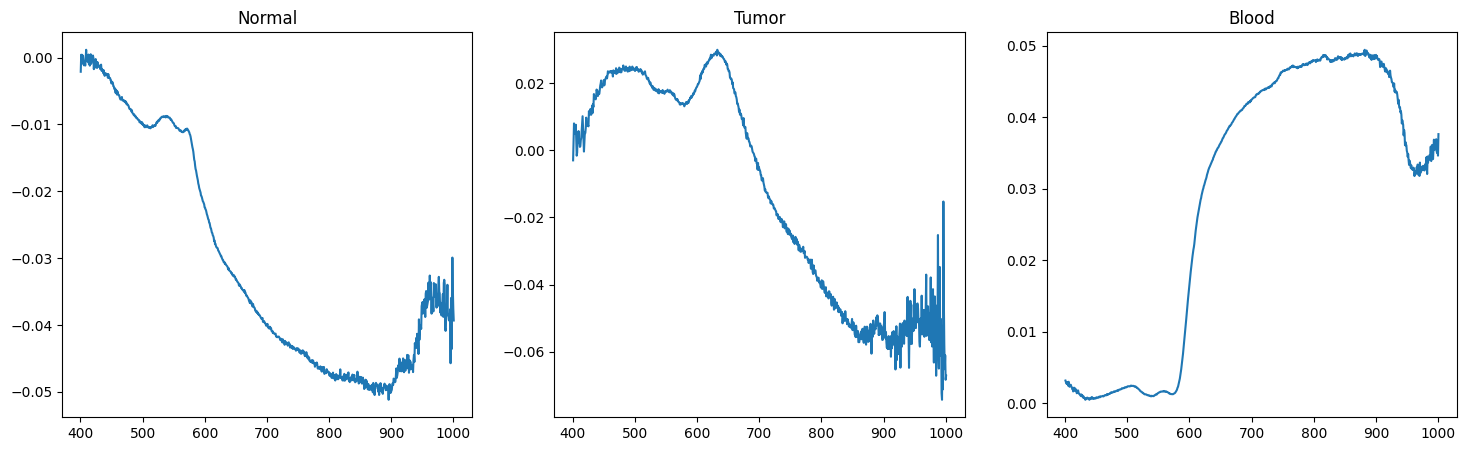

In [12]:
# pca_img = img.asarray()
pca_img = calibrate_img(img, white_ref, dark_ref)

bands = img.bands.centers
class_ids = [1,2,3]

plt.figure(figsize=(18,5))
# # perform PCA for each class and plot the weights
for i, class_id in enumerate(class_ids):
    mask = np.where(gt_map.asarray()[:,:,0] == class_id)
    print(len(mask[0]))
    class_pixels = pca_img[mask]
    pca = PCA(1)
    pca.fit(class_pixels)
    # plot the weights
    plt.subplot(1,len(class_ids),i+1)
    plt.title(class_labels[class_id])
    for j in range(1):
        plt.plot(bands, pca.components_[j])


Inter-class PCA

N.shape=(4516, 826), T.shape=(855, 826), B.shape=(8697, 826)
[0.69376157 0.19391852]
[0.86363213 0.03219183]
[0.82678829 0.08737949]
[0.4347946  0.36203823]


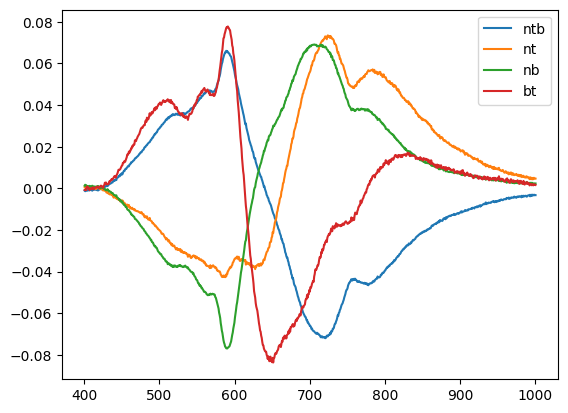

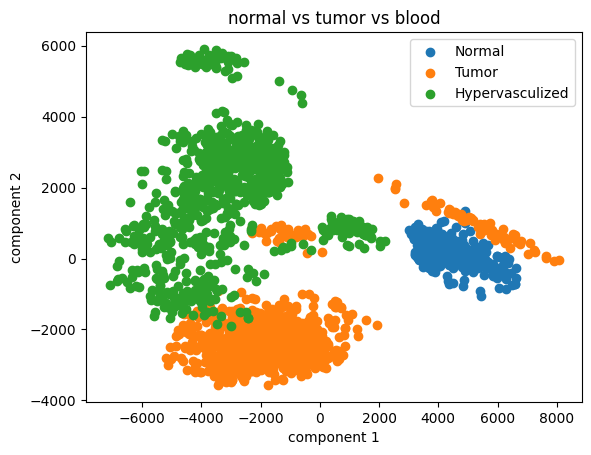

In [113]:
max_samples = 1000 # maximum number of samples per class
band_centers = img.bands.centers

# pca_img = img.asarray()
# pca_img = calibrate_img(img, white_ref, dark_ref)
# pca_img = calibrate_img_advanced(img, white_ref, dark_ref)
# pca_img = R_E
pca_img = R_E_norm_alpha

N = pca_img[np.where(gt_map.asarray()[:,:,0] == 1)]
T = pca_img[np.where(gt_map.asarray()[:,:,0] == 2)]
B = pca_img[np.where(gt_map.asarray()[:,:,0] == 3)]
print(f"{N.shape=}, {T.shape=}, {B.shape=}")

# select random samples from each class such that the number of samples is equal to the smallest class or max_samples
nsamples = min(N.shape[0], T.shape[0], B.shape[0])
if nsamples > max_samples:
    nsamples = max_samples

idx_N = np.random.choice(N.shape[0], nsamples, replace=False)
N = N[idx_N]
idx_T = np.random.choice(T.shape[0], nsamples, replace=False)
T = T[idx_T]
idx_B = np.random.choice(B.shape[0], nsamples, replace=False)
B = B[idx_B]


N_and_T_and_B = np.concatenate((N, T, B))
N_and_T = np.concatenate((N, T))
N_and_B = np.concatenate((N, B))
B_and_T = np.concatenate((T, B))

pca = PCA(2)
plt.figure()
pca.fit(N_and_T_and_B)
print(pca.explained_variance_ratio_)
plt.plot(band_centers, pca.components_[0], label="ntb")
pca.fit(N_and_T)
print(pca.explained_variance_ratio_)
plt.plot(band_centers, pca.components_[0], label="nt")
pca.fit(N_and_B)
print(pca.explained_variance_ratio_)
plt.plot(band_centers, pca.components_[0], label="nb")
pca.fit(B_and_T)
print(pca.explained_variance_ratio_)
plt.plot(band_centers, pca.components_[0], label="bt")
plt.legend()

ntb = pca.fit_transform(N_and_T_and_B)

plt.figure()
Y = np.repeat([1, 2, 3], nsamples)
for i in range(1,4):
    plt.scatter(ntb[Y==i, 0], ntb[Y==i, 1], label=class_labels[i])
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('normal vs tumor vs blood')
plt.legend()

# Y = [1 for _ in range(nsamples)] + [2 for _ in range(nsamples)] + [3 for _ in range(nsamples)]
# scatter = plt.scatter(ntb[:, 0], ntb[:, 1],
#             c=Y, edgecolor='none', alpha=0.5,
#             cmap=plt.cm.get_cmap('viridis', 10))
# cbar = plt.colorbar(scatter, ticks=np.arange(3))
# cbar.set_label('Label for the Colorbar')

# # Set tick labels for the colorbar
# cbar.set_ticklabels(['Normal', 'Tumor', 'Hypervasculized'])
